In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [ ]:
df=pd.read_csv('monthly-milk-production-pounds-p.csv')
df.head()

In [ ]:
df.columns=['Month','Milk']
df.tail()

In [ ]:
df.drop(168,axis=0,inplace=True)

In [ ]:
df['Month']=pd.to_datetime(df['Month'])

In [ ]:
df.set_index('Month',inplace=True)

In [ ]:
df.describe().transpose()

In [ ]:
df.plot();

In [ ]:
time_series=df['Milk']

In [ ]:
time_series.rolling(12).mean().plot(label='12 Month Rolling Mean')
time_series.rolling(12).std().plot(label='12 Month Rolling Std')
time_series.plot()
plt.legend();

## ETS

In [ ]:
decomp=sm.tsa.seasonal_decompose(time_series)

In [ ]:
fig=decomp.plot()
fig.set_size_inches(15,6)

# Part 2

## Stationarity Test (AdFuller)

In [ ]:
result=sm.tsa.stattools.adfuller(df['Milk'])

In [ ]:
def adf_check(Time_Series):
    result=sm.tsa.stattools.adfuller(Time_Series)
    print('Augmented Dicky-Fuller Test')
    labels=['ADF Test Statistic','P-Value','No. of Lags','No. of Obsv']

    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1]<=0.05:
        print('Strong Evidence against Null hypothesis')
        print('Reject null hypothesis')
        print('Data has no unit root and is stationary')
    else:
        print('Weak Evidence against Null hypothesis')
        print('Fail to Reject null hypothesis')
        print('Data has a unit root and is not stationary')

In [ ]:
adf_check(df['Milk'])

In [ ]:
df['First Difference']=df['Milk']-df['Milk'].shift(1)

In [ ]:
adf_check(df['First Difference'].dropna())

In [ ]:
df['Second Difference']=df['First Difference']-df['First Difference'].shift(1)

In [ ]:
adf_check(df['Second Difference'].dropna())

In [ ]:
df['Second Difference'].plot()

In [ ]:
df['Seasonal Difference']=df['Milk']-df['Milk'].shift(1)

In [ ]:
adf_check(df['Seasonal Difference'].dropna())

In [ ]:
df['Seasonal First Difference']=df['First Difference']-df['First Difference'].shift(12)

In [ ]:
adf_check(df['Seasonal First Difference'].dropna())

# Auto Correlation and PCA plots

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
fig_first=plot_acf(df['First Difference'].dropna())

In [ ]:
fig_second=plot_acf(df['Seasonal First Difference'].dropna())

In [ ]:
fig_third=plot_acf(df['Seasonal Difference'].dropna())

## Using Pandas

In [ ]:
from pandas.plotting import autocorrelation_plot

In [ ]:
autocorrelation_plot(df['First Difference'].dropna())

In [ ]:
result=plot_pacf(df['Milk'].dropna())

In [ ]:
plot_acf(df['Seasonal First Difference'].dropna())
plot_pacf(df['Seasonal First Difference'].dropna())

# Part 4

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
# help(ARIMA)

In [39]:
model=sm.tsa.statespace.SARIMAX(df['Milk'],order=(0,1,0),seasonal_order=(1,1,1,12))

C:\Users\TSC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\TSC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [40]:
result=model.fit()

In [41]:
print(result.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                 Milk   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -534.065
Date:                              Tue, 20 Jul 2021   AIC                           1074.131
Time:                                      19:41:57   BIC                           1083.261
Sample:                                  01-01-1962   HQIC                          1077.839
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.58

### Adding more rows to dataframe

In [53]:
from pandas.tseries.offsets import DateOffset

In [54]:
futuredates=[df.index[-1] + DateOffset(months=x) for x in range(1,25)]

In [67]:
newdf=pd.concat((df,pd.DataFrame(index=futuredates,columns=df.columns)),axis=0)

In [69]:
newdf['forecast']=result.predict(start=168,end=192)

In [71]:
newdf.tail()

,Milk,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1977-08-01,NaN,NaN,NaN,NaN,NaN,911.918956
1977-09-01,NaN,NaN,NaN,NaN,NaN,865.881181
1977-10-01,NaN,NaN,NaN,NaN,NaN,871.027294
1977-11-01,NaN,NaN,NaN,NaN,NaN,836.962995
1977-12-01,NaN,NaN,NaN,NaN,NaN,879.383339


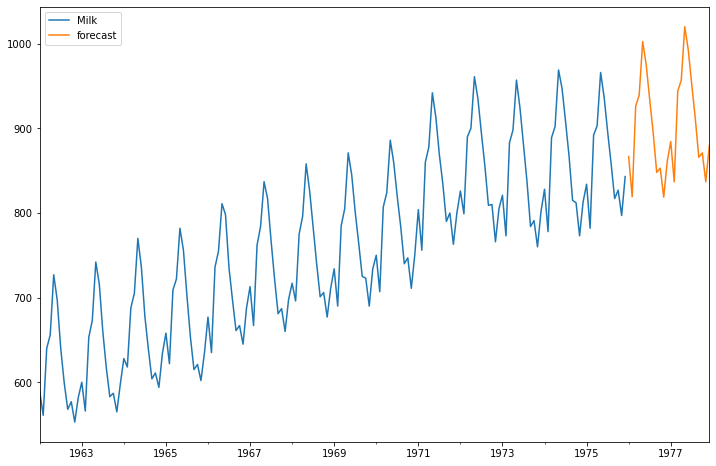

In [74]:
newdf['Milk'].plot(figsize=(12,8))
newdf['forecast'].plot()
plt.legend()